# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [62]:
import numpy as np
from networkx.algorithms.centrality import approximate_current_flow_betweenness_centrality
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

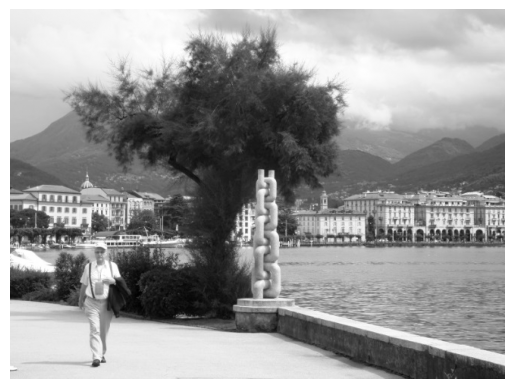

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.axis('off')
imgplot = plt.imshow(img, cmap='gray')


Постройте сингулярное разложение этой матрицы.

In [64]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

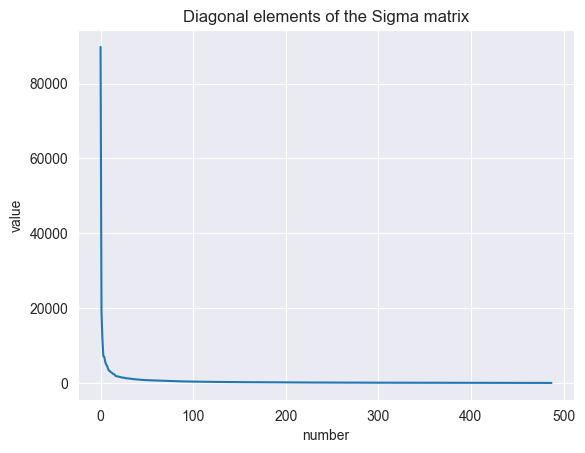

In [65]:
plt.plot(S)
plt.title('Diagonal elements of the Sigma matrix')
plt.xlabel('number')
plt.ylabel('value')
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

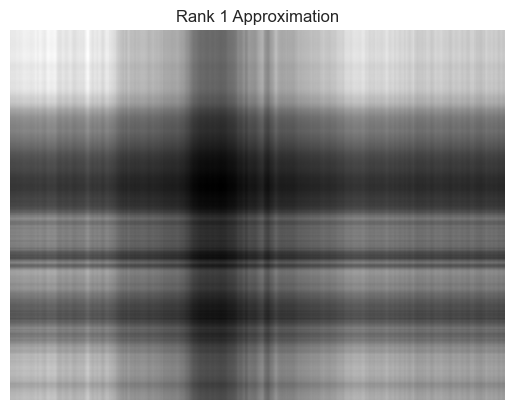

In [66]:
def approximating_svd(U, S, VT, k): 
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

rk_1 = approximating_svd(U, S, VT, 1)
plt.imshow(rk_1, cmap='gray')
plt.title('Rank 1 Approximation')
plt.axis('off')
plt.show()

Результат ожидаем: мы получили картинку без каких-либо деталей, однако если сопоставить с оригиналом, то можно заметить что вертикальная полоса в центре изображения отдалённо напоминает цепь и дерево, которое левее и темнее её на картинке


**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

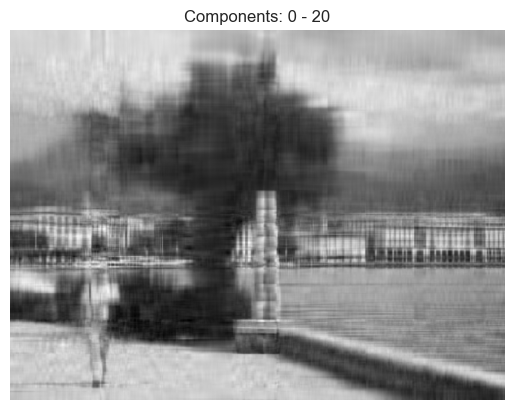

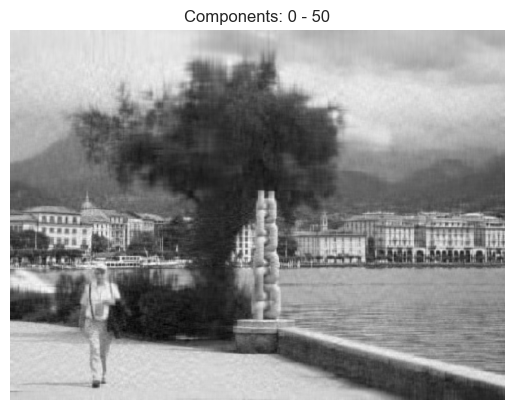

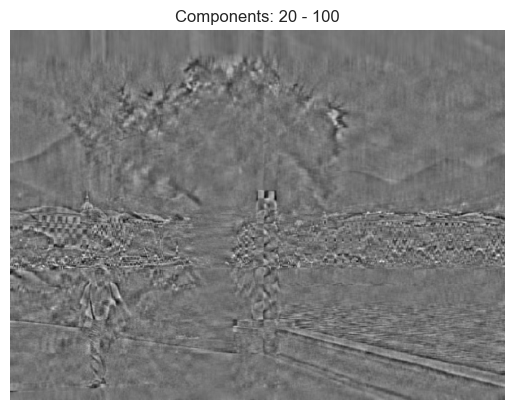

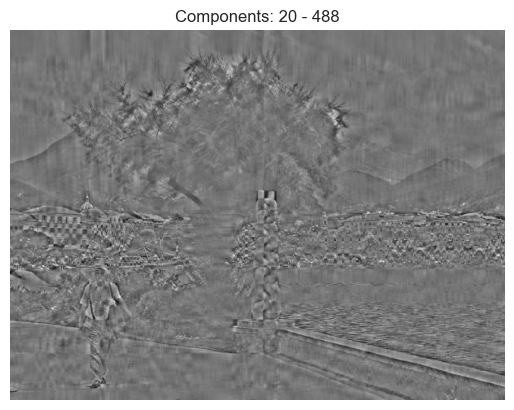

In [67]:
def another_approximating(U, S, VT, a, b):
    return U[:, a:b] @ np.diag(S[a:b]) @ VT[a:b, :]

ranges = [(0, 20), (0, 50), (20, 100), (20, len(S))]
for (a, b) in ranges:
    new_img = another_approximating(U, S, VT, a, b)
    plt.imshow(new_img, cmap='gray')
    plt.title(f"Components: {a} - {b}")
    plt.axis('off')
    plt.show()

1-20: мы получили более-менее цельное представление деталей картинки

1-50: картинка походит на оригинал (качество заметно лучше предыдущей)

20-100 и 20-488: на первый взгляд выглядят как шум, но на самом деле можем увидеть силуэты человека и дерева

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

**Ответ:** очевидно, что мы пытаемся найти такое количество мы пытаемся найти такое количество главных компонент $r$, которое будет давать максимально близкое изображение, но при этом надо найти его так, чтобы оно не тратило памяти и такое приближение стало целесообразным. То есть начиная с какого-то момента мы выйдем на "плато" улучшения точности приближения, и в этот момент сможем сделать вывод об оптимальном значении $r$. Визуально хочется взять хотя бы 100 компонент, но если посмотреть на картинки ниже, то становится ясно, что примерно со 125 компоненты особой разницы в точности не наблюдается (вообще надо было подсчитать норму Фробениуса чтобы подтвердить это но к сожалению есть что есть)

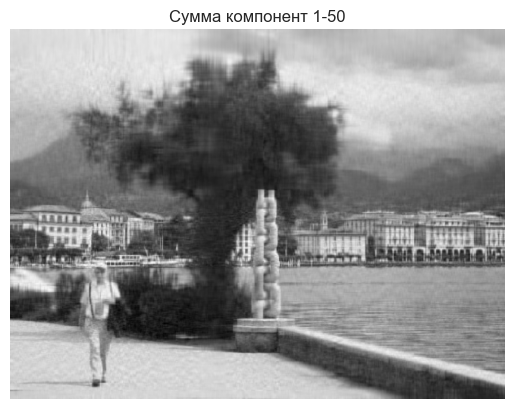

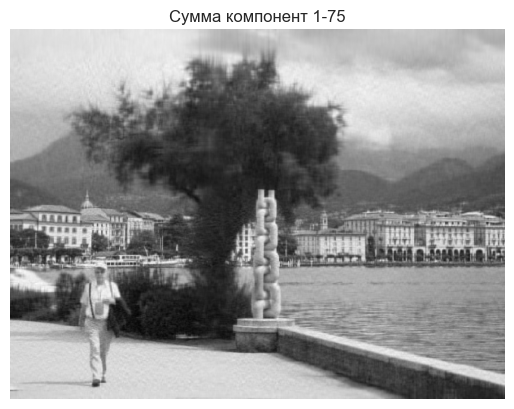

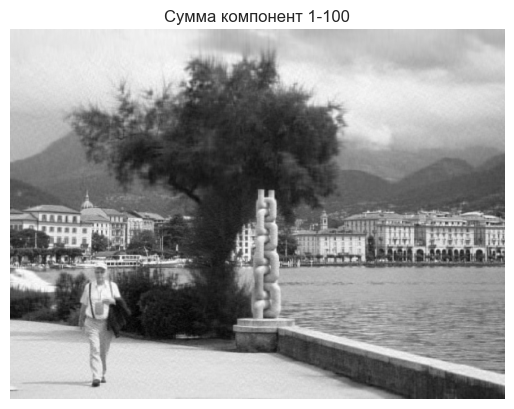

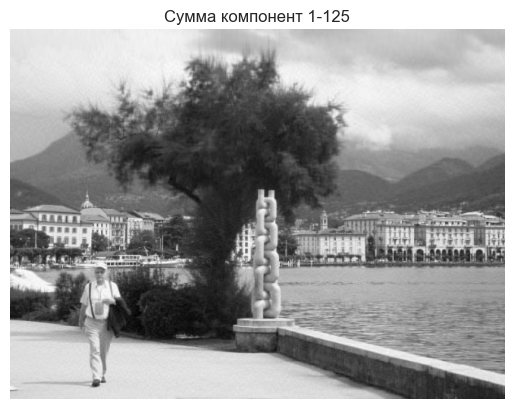

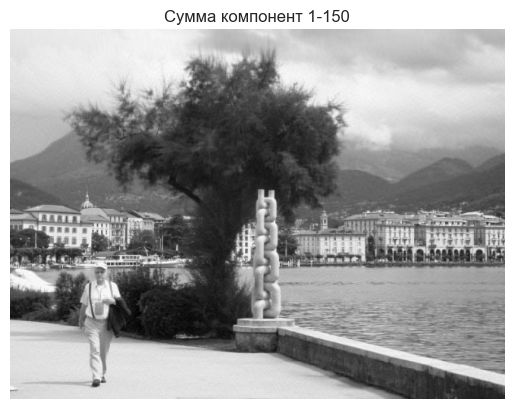

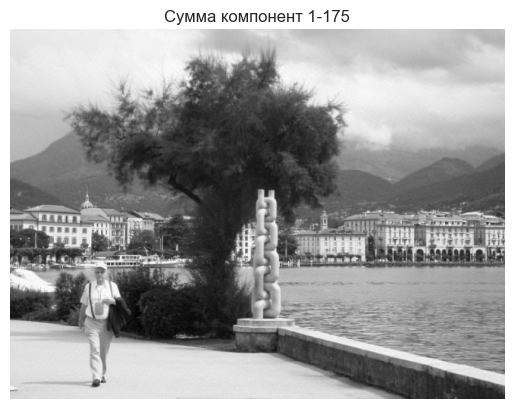

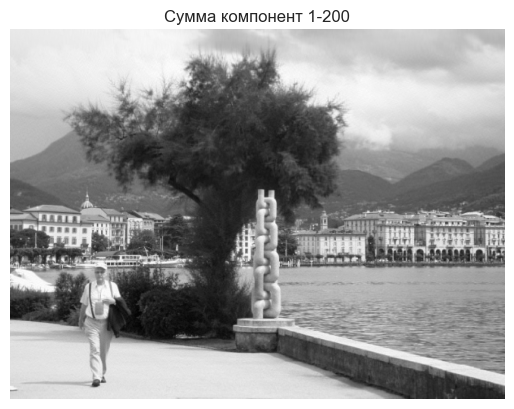

In [68]:
#Получение оптимального r
for r in range(50, 225, 25): #Циклы запрещены только для визуализации
  img_r=U[:,0:r] @ np.diag(S[:r]) @ VT[0:r,:]
  plt.imshow(img_r, cmap='gray')
  plt.title(f'Сумма компонент 1-{r}')
  plt.axis('off')
  plt.show()

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

**Ответ:** вычислим явно $m$ и $n$ и посчитаем что получилось

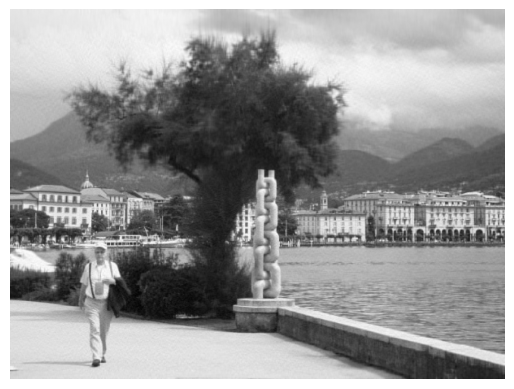

In [69]:
r=125 # the best one I guess (ili okolo togo)
S_r=np.diag(S[0:r])
img_r=U[:,0:r]@S_r@VT[0:r,:]
plt.imshow(img_r, cmap='gray')
plt.axis('off')
plt.show()

In [70]:
m, n = np.shape(img)
print(f'm = {m}, n = {n}')
print(f'size = {m * n}')
print(f'new_size = {r * (m + n + 1)}')
print(f'difference = {(m * n)/(r*(m + n + 1))}')

m = 488, n = 653
size = 318664
new_size = 142750
difference = 2.232322241681261


**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [71]:
from sys import getsizeof
U_r=U[:,0:r].copy()
VT_r=VT[0:r,:].copy()
size=getsizeof(img)
size_merge=getsizeof(S_r)+getsizeof(U_r)+getsizeof(VT_r)
print(f'Old size: {size}')
print(f'New size: {size_merge}')
print(f'Difference: {size/size_merge} ... WOW 0_0')

Old size: 2549440
New size: 1266384
Difference: 2.0131650431464707 ... WOW 0_0


**Ответ:** изображение занимает примерно в 2 раза меньше места, чем раньше. Это крутой результат, но мб при подсчёте нормы Фробениуса и нормальной оптимизации можно было бы улучшить результат.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

**Ответ:** Имеем для ненулевых векторов:


$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$

$w=\alpha*v$, где $|v|$=1 

$\sigma_1=\mathrm{max}_v*\frac{X*\alpha*v}{\alpha}=\mathrm{max}_v*Xv$

Поскольку $\mathrm{max}_{|v|=1}|X\cdot v|\Leftrightarrow \mathrm{max}_v|X\cdot v|^2=v^t*X^T*X*v$ - сз $X^TX$, а максимальное собственное значение этой штуки - необходимое $\sigma_1^2$

значит $\mathrm{max}_{|v|=1}|X\cdot v|=\sigma_1$ , что докзаывает первые два равенства

Рассмотрим $\sigma_1=\mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$

Разложим $X=U\Sigma V^T$, тогда $\mathrm{max}_{|u|=|v| = 1}~|u^T Xv|=\mathrm{max}_{|u|=|v| = 1}~|u^T U \Sigma V^T v|$, сделаем замену $a=u^T U$ и $b=V^T u$ эти вектора имеют тоже длину 1 и просто повернуты относительно $u$ и $v$

тогда теперь нам надо максимизировать $a*\Sigma*b$, очевидно что нужно просто поставить 1 в ячейку 1 у $a,b$ и тогда $\mathrm{max}_{|u|=|v| = 1}~|u^T Xv| = \sigma_1$


**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

**Ответ:** Рассмотрим векторы s и c равные 
$$s=\begin{pmatrix} sin(0)\\ \ldots \\ sin(n-1)
\end{pmatrix}
$$
$$
c=\begin{pmatrix} cos(0)\\ \ldots \\ cos(n-1)
\end{pmatrix}
$$

тогда матрица $A=sc^T$, для компактного SVD разложения нужно нормировать эти векторы: 
$$u=\cfrac {s}{||s||}=\begin{pmatrix} sin(0)/||s||\\ \ldots \\ sin(n-1)/||s||\end{pmatrix}$$
$$v=\cfrac {c}{||c||}=\begin{pmatrix} cos(0)/||c||\\ \ldots \\ cos(n-1)/||c||\end{pmatrix}$$
$$\sigma_1=||s||*||c||$$
$$\Sigma=[||s||*||c||]$$



**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.


**Ответ:** Разложим $A=U \Sigma V^T$, 

где U - ортогональная матрица $m\times m$,

V - ортогональная матрица $n\times n$, 

$\Sigma$ - матрица $m\times n$ матирца в котрой на главной диагонали стоят сингулярные числа

чтобы найти образ сделаем замену $z = V^T x$ 

тогда искомый образ это $Im(A)=U \Sigma z$, где z $ \in \mathbb{R}^n$, а $U* \Sigma$ это первые r столбцов

а значит образ это $\mathrm{Im}\,\mathcal{A} \;=\; \langle u_1,\,u_2,\,\dots,\,u_r\rangle$ 

с помощью аналогичной замены поймем что ядро это когда в z элементы 1..r = 0,  значит что $\ker(\mathcal{A}) \;=\; \langle v_{r+1},\,v_{r+2},\,\dots,\,v_{n}\rangle$ 


**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

**Ответ:** Матрица

$$
P = A(A^T A)^{-1}A^T
$$

задаёт ортогональную проекцию на подпространство $\mathrm{Col}(A)\subset \mathbb{R}^m$. поскольку $\mathrm{rank}(A)=n$ у $P$ ровно $n$ собственных значений, равных $1$, и $m - n$ собственных значений, равных $0$. значит все сингулярные числа матрицы $P$ равны либо $1$ (в количестве $n$), либо $0$ (в количестве $m-n$).

в полном сингулярном разложении

$$
P \;=\; U\,\Sigma\,V^T,
$$

где $U, V \in Mat_{m\times m}(\mathbb{R})$ — ортогональные матрицы, матрица $\Sigma$ имеет размер $m\times m$ и выглядит так:

$$
\Sigma \;=\; \mathrm{diag}\Bigl(\underbrace{1,\,1,\,\dots,\,1}_{n}, \;\underbrace{0,\,0,\,\dots,\,0}_{m-n}\Bigr).
$$


**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


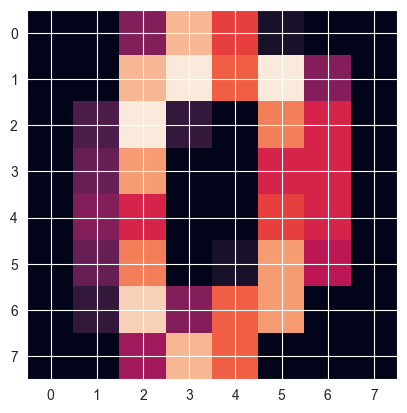

In [72]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [73]:
U, S, VT = np.linalg.svd(digits.data)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

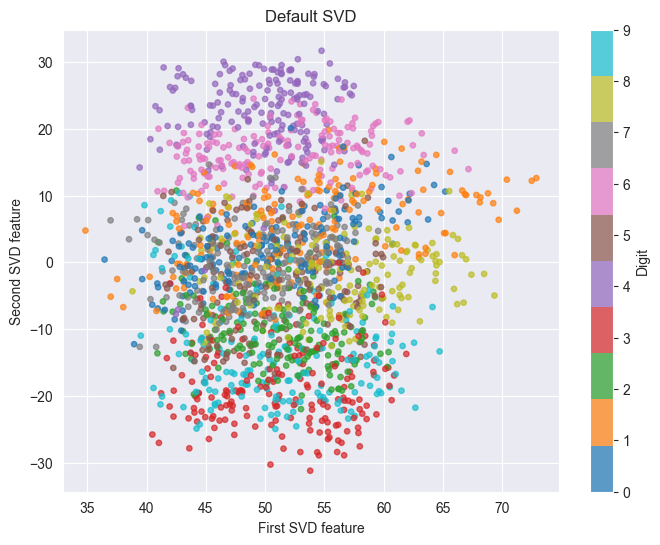

In [74]:
coords = U[:, :2] * S[:2]
targets = digits.target

cmap = plt.get_cmap('tab10', 10)

plt.figure(figsize=(8, 6))
plt.scatter(
    coords[:, 0], coords[:, 1],
    c=targets, cmap=cmap, s=15, alpha=0.7
)
cbar = plt.colorbar(ticks=np.arange(10))
cbar.set_label('Digit')

plt.title("Default SVD")
plt.xlabel('First SVD feature')
plt.ylabel('Second SVD feature')
plt.show()


**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

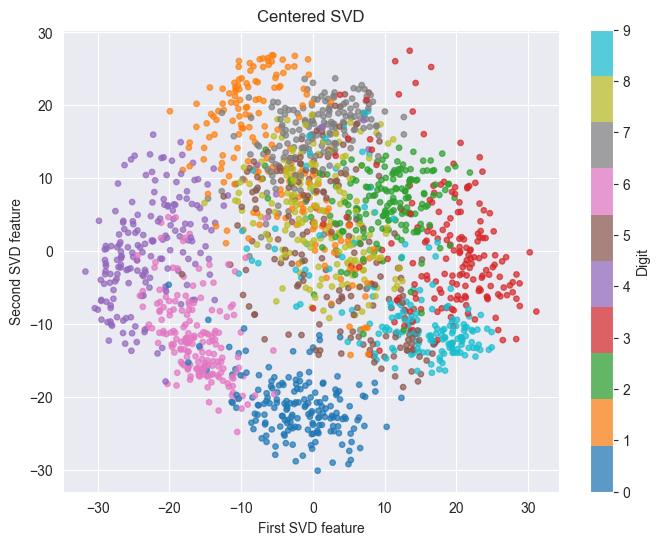

In [75]:
data_centered = digits.data - np.mean(digits.data, axis=0)

U_centered, S_centered, Vt_centered = np.linalg.svd(data_centered, full_matrices=False)

coords_centered = U_centered[:, :2] * S_centered[:2]
targets = digits.target

cmap = plt.get_cmap('tab10', 10)

plt.figure(figsize=(8, 6))
plt.scatter(
    coords_centered[:, 0], coords_centered[:, 1],
    c=targets, cmap=cmap, s=15, alpha=0.7
)
cbar = plt.colorbar(ticks=np.arange(10))
cbar.set_label('Digit')

plt.title("Centered SVD")
plt.xlabel('First SVD feature')
plt.ylabel('Second SVD feature')
plt.show()


**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

**Ответ:** Во втором случае цифры кластеризуются более точно, так как во второй выборке мы отнормировали (точнее, "отцентровали") данные, с ними получилась более точная кластеризация

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

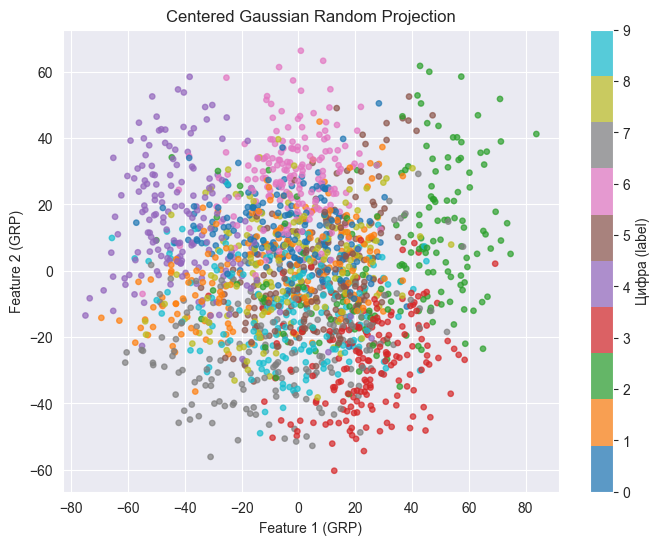

In [76]:
from sklearn.random_projection import GaussianRandomProjection as grp
data = grp(n_components=2, random_state=42)

coords = data.fit_transform(data_centered)

plt.figure(figsize=(8, 6))
plt.scatter(
    coords[:, 0], coords[:, 1],
    c=targets, cmap=plt.get_cmap('tab10', 10), s=15, alpha=0.7
)
cbar = plt.colorbar(ticks=np.arange(10))
cbar.set_label('Цифра (label)')

plt.xlabel('Feature 1 (GRP)')
plt.ylabel('Feature 2 (GRP)')
plt.title('Centered Gaussian Random Projection')
plt.show()


**Ответ:** Для данного датасета очевидна превосходность SVD, если судить по графикам на отцентрованных данных
Но GRP может выиграть в скорости и памяти у SVD, если брать огромные датасеты и огрмное количество признаков
Поэтому лучше использовать SVD для небольших датасетов, но GRP более эффективен в больших

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [77]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/var/folders/3_/y7sv5lk95kqft0ww7wsbd6cm0000gn/T/ipykernel_55299/407240714.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/var/folders/3_/y7sv5lk95kqft0ww7wsbd6cm0000gn/T/ipykernel_55299/407240714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

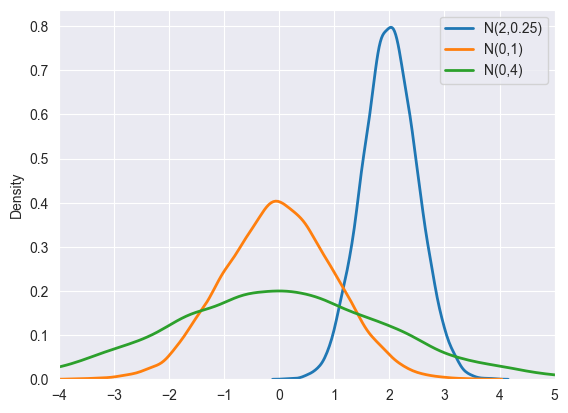

In [78]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

/var/folders/3_/y7sv5lk95kqft0ww7wsbd6cm0000gn/T/ipykernel_55299/207168843.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s, shade=False, color='g')


<Axes: ylabel='Density'>

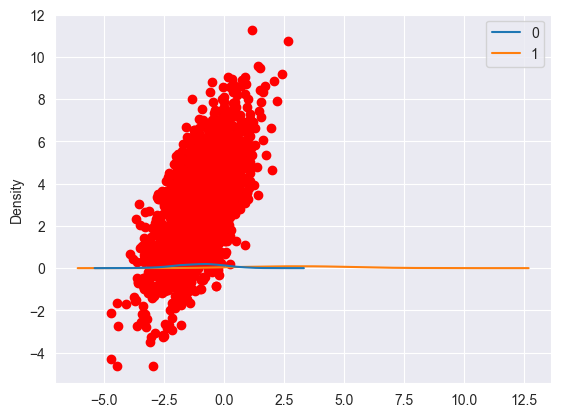

In [79]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

/var/folders/3_/y7sv5lk95kqft0ww7wsbd6cm0000gn/T/ipykernel_55299/962077290.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade=False, color='g')


<Axes: ylabel='Density'>

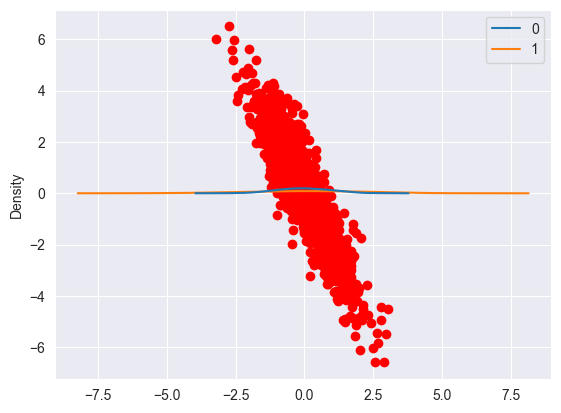

In [80]:
N = 1000
x = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2], [-2, 5]]), size=N)
plt.scatter(x[:, 0], x[:, 1], color='red')
sns.kdeplot(x, shade=False, color='g')

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

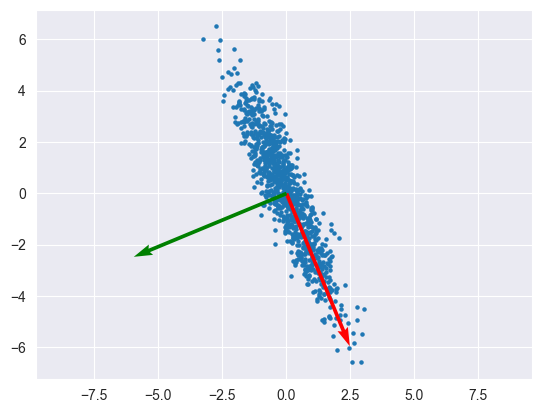

In [81]:
U, S, VT = np.linalg.svd(x, full_matrices=False)
plt.scatter(x[:, 0], x[:, 1], s=5)
plt.quiver(0, 0, VT[0, 0], VT[0, 1], color='r', scale=3)
plt.quiver(0, 0, VT[1, 0], VT[1, 1], color='g', scale=3)
plt.axis('equal')
plt.show()


**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

**Ответ:** Данная матрица

$$
\Sigma = \begin{pmatrix}1 & -2\\ -2 & 5\end{pmatrix}.
$$

Ищем корни хармногочлена $\det(\Sigma - t E)=0$:

$$
(1-t)(5-t) - 4 = t^2 - 6t +1 = 0
\;\;\Rightarrow\;\;
t_{1,2} = 3 \pm 2\sqrt{2}.
$$

Для $t_1 = 3 + 2\sqrt{2}$:

$$
(1-t_1)x -2y = 0 \;\;\Longrightarrow\;\; y = -\bigl(1+\sqrt{2}\bigr)\,x
\;\;\Rightarrow\;\; v_1 \sim \begin{pmatrix}1 \\ -(1+\sqrt{2})\end{pmatrix}.
$$

Для $t_2 = 3 - 2\sqrt{2}$:

$$
(1 - t_2)x -2y = 0 \;\;\Longrightarrow\;\; y = (\sqrt{2}-1)\,x
\;\;\Rightarrow\;\; v_2 \sim \begin{pmatrix}1 \\ \sqrt{2}-1\end{pmatrix}.
$$
Эти два вектора $v_1$ и $v_2$ задают главные оси эллипсоида и совпадают с теми направлениями, что мы наблюдали при SVD на пункте 2.


Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

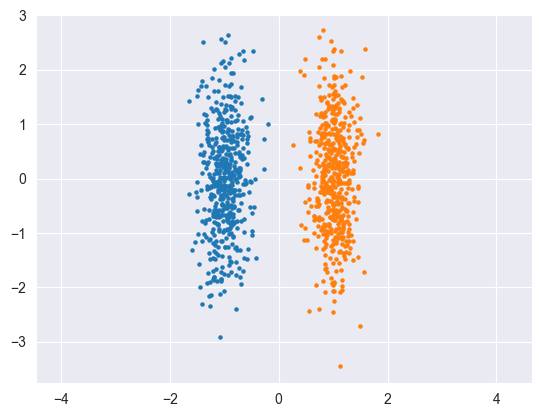

In [82]:
cov = [[0.05, 0], [0, 1]] # sosiska
x1 = np.random.multivariate_normal([-1, 0], cov, 500)
x2 = np.random.multivariate_normal([1, 0], cov, 500)

plt.scatter(x1[:, 0], x1[:, 1], s=5)
plt.scatter(x2[:, 0], x2[:, 1], s=5)
plt.axis('equal')
plt.show()

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

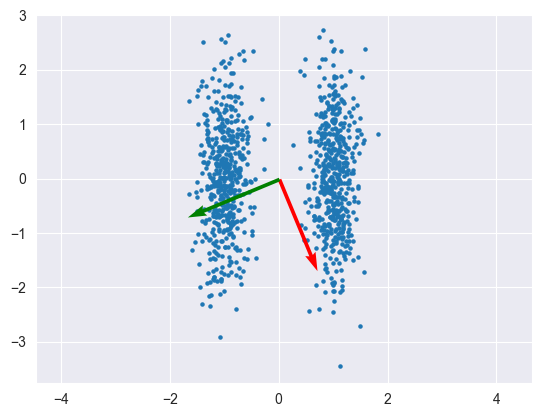

In [83]:
X = np.vstack((x1, x2))

plt.scatter(X[:, 0], X[:, 1], s=5)
plt.quiver(0, 0, VT[0, 0], VT[0, 1], color='r', scale=5)
plt.quiver(0, 0, VT[1, 0], VT[1, 1], color='g', scale=5)
plt.axis('equal')
plt.show()


Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

**Ответ:** Кажется тут всё плохо потому что векторы направлены не совсем туда, куда надо(

In [84]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [85]:
mean = [1, 1]
cov = [[1, 0], [0, 4]]
x = np.random.multivariate_normal(mean, cov, size=1000)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

**Ответ:** Наша матрица ковариации диагональна. Поэтому на диагоналях стоят собственные значения. Значит, направления полуосей эллипса-облака точек совпадают с направлениями векторов базиса

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

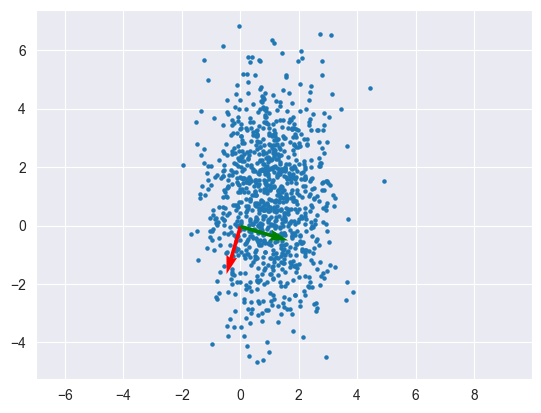

In [86]:
U, S, VT = np.linalg.svd(x, full_matrices=False)

plt.scatter(x[:, 0], x[:, 1], s=5)
plt.quiver(0, 0, VT[0, 0], VT[0, 1], color='r', scale=10)
plt.quiver(0, 0, VT[1, 0], VT[1, 1], color='g', scale=10)
plt.axis('equal')
plt.show()

**Ответ:** SVD на не центрированных данных захватывает в первую очередь (смещение) выборки, а не именно структуру ковариации.
Поэтому первый признак часто направлен в сторону среднего вектора, а не в направлении максимальной дисперсии. Это искажает интерпретацию главных компонент и не отражает действительность (увы). 
 Как исправить: можно предварительно центрировать данные. Тогда SVD будет работать лучше
